<a href="https://colab.research.google.com/github/ayeshashoukat189/Coursera/blob/master/Patient_survival_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [9]:
test_data= pd.read_csv("./sample_data/california_housing_test.csv")

In [10]:
test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [11]:
# Display basic statistics of the dataset
print("\nBasic statistics of the dataset:")
print(test_data.describe())


Basic statistics of the dataset:
         longitude    latitude  housing_median_age   total_rooms  \
count  3000.000000  3000.00000         3000.000000   3000.000000   
mean   -119.589200    35.63539           28.845333   2599.578667   
std       1.994936     2.12967           12.555396   2155.593332   
min    -124.180000    32.56000            1.000000      6.000000   
25%    -121.810000    33.93000           18.000000   1401.000000   
50%    -118.485000    34.27000           29.000000   2106.000000   
75%    -118.020000    37.69000           37.000000   3129.000000   
max    -114.490000    41.92000           52.000000  30450.000000   

       total_bedrooms    population  households  median_income  \
count     3000.000000   3000.000000  3000.00000    3000.000000   
mean       529.950667   1402.798667   489.91200       3.807272   
std        415.654368   1030.543012   365.42271       1.854512   
min          2.000000      5.000000     2.00000       0.499900   
25%        291.000000  

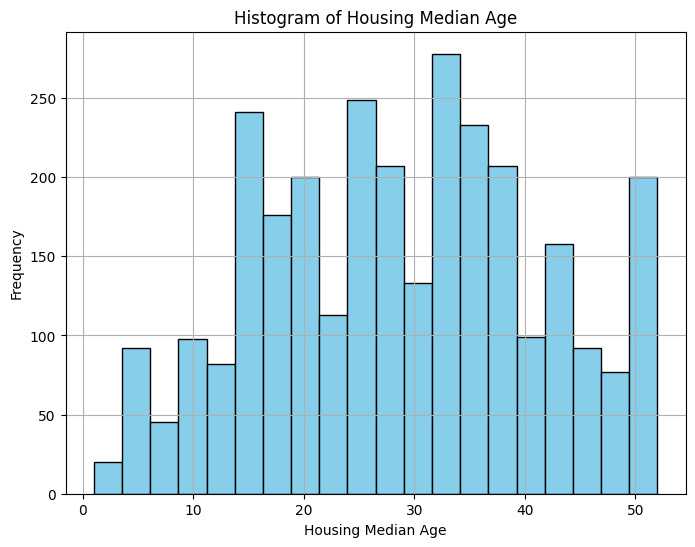

In [12]:
# Visualize the data: Histogram of housing median age
plt.figure(figsize=(8, 6))
plt.hist(test_data['housing_median_age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Housing Median Age')
plt.xlabel('Housing Median Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

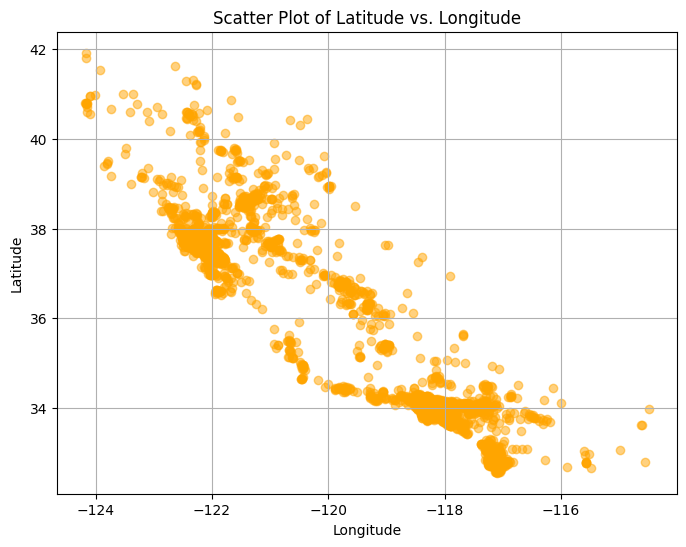

In [13]:
# Visualize the data: Scatter plot of latitude vs. longitude
plt.figure(figsize=(8, 6))
plt.scatter(test_data['longitude'], test_data['latitude'], alpha=0.5, color='orange')
plt.title('Scatter Plot of Latitude vs. Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [14]:
# Select a single feature (e.g., 'median_income') and the target variable (e.g., 'median_house_value')
X = test_data['median_income'].values.reshape(-1, 1)
y = test_data['median_house_value'].values

In [16]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [17]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Implement the simple linear regression model
class SimpleLinearRegression:
    def __init__(self):
        self.coef_ = None  # Slope (Coefficient of the independent variable)
        self.intercept_ = None  # Intercept (Constant term)

    def fit(self, X, y):
        # Calculate the mean of X and y
        mean_x = np.mean(X)
        mean_y = np.mean(y)

        # Total number of values
        n = len(X)

        # Calculate the slope and intercept
        numerator = 0
        denominator = 0
        for i in range(n):
            numerator += (X[i] - mean_x) * (y[i] - mean_y)
            denominator += (X[i] - mean_x) ** 2
        self.coef_ = numerator / denominator
        self.intercept_ = mean_y - (self.coef_ * mean_x)

    def predict(self, X):
        return self.intercept_ + (self.coef_ * X)

In [19]:
# Train the model using the training data
model = SimpleLinearRegression()
model.fit(X_train, y_train)


In [20]:
# Evaluate the model using the testing data
y_pred = model.predict(X_test)

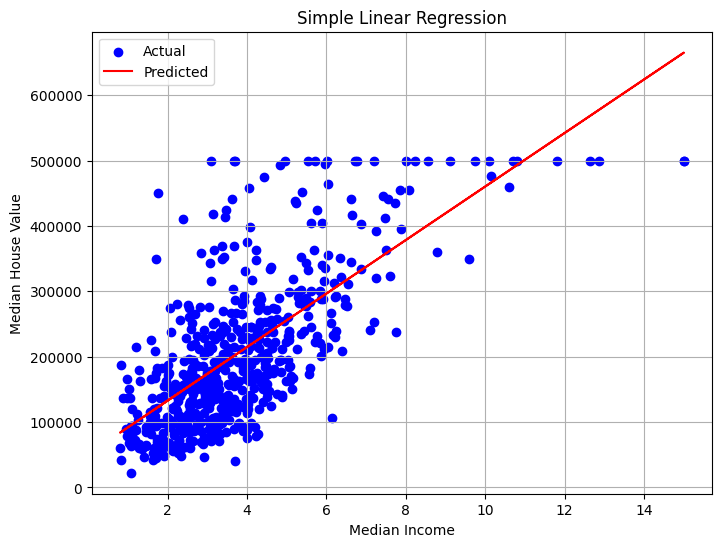

In [21]:
# Visualize the model's predictions
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title('Simple Linear Regression')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
# Select features for clustering (e.g., 'latitude' and 'longitude')
X = test_data[['latitude', 'longitude']].values

In [23]:
# For K-Means, it's usually a good practice to standardize the features
# Here, we'll simply normalize the features to have zero mean and unit variance
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)


In [24]:
# Implement the K-Means clustering algorithm
class KMeans:
    def __init__(self, n_clusters, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X):
        # Randomly initialize cluster centroids
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]

        for _ in range(self.max_iter):
            # Assign each data point to the nearest cluster centroid
            labels = np.argmin(((X[:, np.newaxis] - self.centroids) ** 2).sum(axis=2), axis=1)

            # Update cluster centroids
            new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(self.n_clusters)])

            # Check for convergence
            if np.allclose(self.centroids, new_centroids):
                break

            self.centroids = new_centroids

        return labels

In [25]:

# Apply K-Means to the dataset
kmeans = KMeans(n_clusters=3)
labels = kmeans.fit(X)

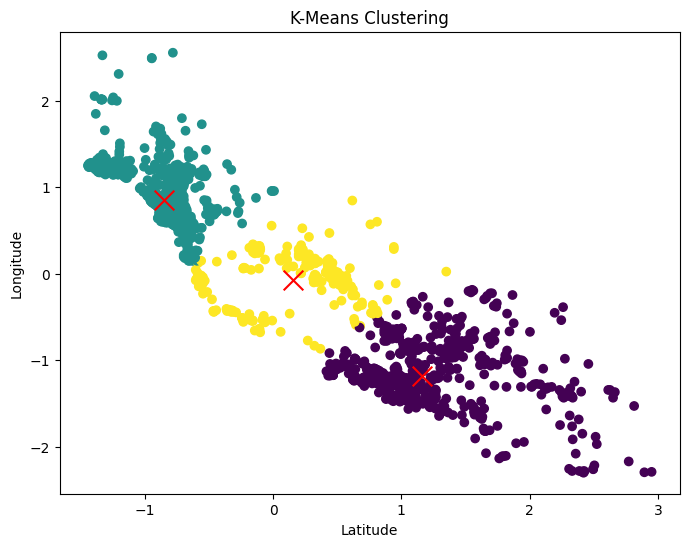

In [26]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], marker='x', s=200, c='red')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('K-Means Clustering')
plt.show()